## Expectation Reflection for Heart Disease Diagnosis
In this work, we apply our method, Expectation Reflection (ER), to predict heart disease. We compare the performance of ER with other existing methods such as Logistic Regression, Naive Bayes, Dicision Tree, Random Forest, k-nearest neighbors, and Support Vector Machines (SVM).

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import expectation_reflection as ER

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
# load data
df = pd.read_csv('../heartdisease_data.csv',sep= ',')
df[0:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


The data contains 13 features:<br/>
0) age: Age (years) --> discrete <br/>
1) sex: Sex (1: male, 0: female) --> categorical <br/>
2) cp: Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic) --> categorical <br/>
3) trestbps: Resting blood pressure (mm Hg on admission to the hospital) --> continuous <br/>
4) chol: Cholesterol measurement (mg/dl) --> continuous <br/>
5) fbs: Fasting blood sugar (0: <120 mg/dl, 1: > 120 mg/dl) --> categorical <br/>
6) restecg: Resting electrocardiographic measurement (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria) --> categorical <br/>
7) thalach: Maximum heart rate achieved --> continuous<br/>
8) exang: Exercise induced angina (1: yes; 0: no) --> categorical <br/>
9) oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot) --> continuous<br/>
10) slope: The slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping) --> categorical<br/>
11) ca: The number of major vessels (0-4) --> categorical <br/>
12) thal: Thalassemia (a type of blood disorder)  (1: normal; 2: fixed defect; 3: reversable defect) --> categorical <br/>

and 1 target: Heart disease (0: no, 1: yes) <br/>

In [4]:
# select features and target:
df = np.array(df).astype(float)

# features:
X = df[:,:-1]
l,n = X.shape
print(l,n)

# target:
y = df[:,-1]
# convert 1,0 to 1,-1:
y = 2*y - 1

(303, 13)


### Convert categorical variables to one hot

In [5]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')

# sex = X[:,1] = 0,1 --> 2
x1 = onehot_encoder.fit_transform(X[:,1].reshape(-1,1))

# cp = X[:,2] = 1,2,3,4 --> 4
x2 = onehot_encoder.fit_transform(X[:,2].reshape(-1,1))

# fbs = X[:,5] = 0,1 --> 2
x5 = onehot_encoder.fit_transform(X[:,5].reshape(-1,1)) 

# restecg = X[:,6] = 0,1,2 --> 3
x6 = onehot_encoder.fit_transform(X[:,6].reshape(-1,1))

#exang: = X[:,8] = 0,1 --> 2
x8 = onehot_encoder.fit_transform(X[:,8].reshape(-1,1))

# X[:,10] = 0,1,2 --> 3
x10 = onehot_encoder.fit_transform(X[:,10].reshape(-1,1))

# X[:,11] = 0,1,2,3,4 --> 5
x11 = onehot_encoder.fit_transform(X[:,11].reshape(-1,1)) 

# X[:,12] = 0,1,2,3 --> 4
x12= onehot_encoder.fit_transform(X[:,12].reshape(-1,1)) 

In [6]:
Xnew = np.hstack([X[:,0][:,np.newaxis],x1])
Xnew = np.hstack([Xnew,x2])
Xnew = np.hstack([Xnew,X[:,3:5]])
Xnew = np.hstack([Xnew,x5])
Xnew = np.hstack([Xnew,x6])
Xnew = np.hstack([Xnew,X[:,7][:,np.newaxis]])
Xnew = np.hstack([Xnew,x8])
Xnew = np.hstack([Xnew,X[:,9][:,np.newaxis]])
Xnew = np.hstack([Xnew,x10])
Xnew = np.hstack([Xnew,x11])
Xnew = np.hstack([Xnew,x12])

In [7]:
X = Xnew
X.shape

(303, 30)

In [8]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [9]:
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)

from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

### Prediction

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def ML_inference(X_train,y_train,X_test,y_test,method='expectation_reflection'):
    if method == 'expectation_reflection':
        h0,w = ER.fit(X_train,y_train,niter_max=20,regu=0.001)
        y_pred = ER.predict(X_test,h0,w)
        accuracy = accuracy_score(y_test,y_pred)
        
    else:
        if method == 'logistic_regression':
            model = LogisticRegression(solver='liblinear')

        if method == 'naive_bayes': 
            model = GaussianNB()

        if method == 'random_forest':
            model = RandomForestClassifier(criterion = "gini", random_state = 1,
                           max_depth=3, min_samples_leaf=5,n_estimators=100)        
        if method == 'decision_tree':
            model = DecisionTreeClassifier()  

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)        
        accuracy = accuracy_score(y_test,y_pred)
    return accuracy

In [11]:
list_methods=['expectation_reflection','naive_bayes','logistic_regression','decision_tree','random_forest']

In [12]:
def compare_ML_inference(X,y,train_size):
    npred = 100
    accuracy = np.zeros((len(list_methods),npred))
    for ipred in range(npred):
        X, y = shuffle(X, y)
        X_train0,X_test,y_train0,y_test = train_test_split(X,y,test_size=0.2,random_state = ipred)

        idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y_train0)),replace=False)
        X_train,y_train = X_train0[idx_train],y_train0[idx_train]

        for i,method in enumerate(list_methods):
            accuracy[i,ipred] = ML_inference(X_train,y_train,X_test,y_test,method)
            #print('% 20s :'%method,accuracy)            
        #print(y_train.shape[0],y_test.shape[0])

    return accuracy.mean(axis=1),accuracy.std(axis=1)

In [13]:
list_train_size = [1.,0.8,0.6,0.4,0.2,0.1,0.05]

acc = np.zeros((len(list_train_size),len(list_methods)))
acc_std = np.zeros((len(list_train_size),len(list_methods)))
for i,train_size in enumerate(list_train_size):
    acc[i,:],acc_std[i,:] = compare_ML_inference(X,y,train_size)
    print(train_size,acc[i,:])    

(1.0, array([0.85016393, 0.78131148, 0.8504918 , 0.74704918, 0.83540984]))
(0.8, array([0.83819672, 0.7504918 , 0.84163934, 0.73967213, 0.82721311]))
(0.6, array([0.82754098, 0.7195082 , 0.83901639, 0.72377049, 0.8252459 ]))
(0.4, array([0.80114754, 0.74540984, 0.83032787, 0.72672131, 0.81721311]))
(0.2, array([0.77688525, 0.71377049, 0.81803279, 0.72295082, 0.80295082]))
(0.1, array([0.72868852, 0.70180328, 0.79491803, 0.68442623, 0.73327869]))
(0.05, array([0.72163934, 0.70606557, 0.77163934, 0.67409836, 0.53032787]))


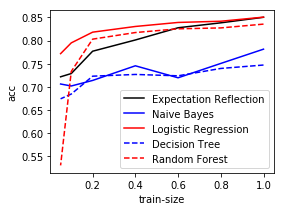

In [14]:
plt.figure(figsize=(4,3))
plt.plot(list_train_size,acc[:,0],'k-',label='Expectation Reflection')
plt.plot(list_train_size,acc[:,1],'b-',label='Naive Bayes')
plt.plot(list_train_size,acc[:,2],'r-',label='Logistic Regression')
plt.plot(list_train_size,acc[:,3],'b--',label='Decision Tree')
plt.plot(list_train_size,acc[:,4],'r--',label='Random Forest')
plt.xlabel('train-size')
plt.ylabel('acc')
plt.legend()